# 1. Import Dependencies

In [2]:
import gym 
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy
# from stable_baselines3.common.env_util import make_atari_env
import os

# 2. Load Environment

In [3]:
environment_name = 'CartPole-v0'
env = gym.make(environment_name)

In [4]:
environment_name

'CartPole-v0'

In [37]:
episodes = 5
for episodes in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0
    
    while not done:
        env.render()
        action = env.action_space.sample()
        n_state, reward, done, info = env.step(action)
        score += reward
    print("Episode:{} Score:{}".format(episodes, score))
env.close()

Episode:1 Score:33.0
Episode:2 Score:14.0
Episode:3 Score:40.0
Episode:4 Score:18.0
Episode:5 Score:28.0


In [8]:
env.reset()

array([0.01498564, 0.01637151, 0.0051424 , 0.03967897], dtype=float32)

In [25]:
episodes = 5 
for episodes in range(1, episodes+1):
    print(episodes)


1
2
3
4
5


In [17]:
env.action_space

Discrete(2)

In [22]:
env.step(1)

(array([ 0.01954146,  0.40645602,  0.00090844, -0.54218173], dtype=float32),
 1.0,
 False,
 {})

In [23]:
env.observation_space.sample()

array([ 4.3225141e+00,  2.8722805e+38,  1.5807092e-01, -2.4126052e+38],
      dtype=float32)

# Understanding the Environment

In [31]:
env.action_space

Discrete(2)

In [32]:
env.action_space.sample()

1

In [33]:
env.observation_space

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)

In [34]:
env.observation_space.sample()

array([-4.6649413e+00,  1.0811321e+38, -3.1947613e-01, -2.1423445e+38],
      dtype=float32)

# Training 

## Types of Reinforcement Learning Algorithms 

### Model-Based vs Model-Free:
Learning based on predictions of the next state/reward or real samples
stable baseline focusses on Model-Free algorithms


## RL Algorithms
This table displays the rl algorithms that are implemented in the stable baselines project, along with some useful characteristics: support for recurrent policies, discrete/continuous actions, multiprocessing.


| Name | Refactored | Recurrent | Box | Discrete | Multi Processing |
| :-: | :-: | :-: | :-: | :-: | :-: |
| A2C | ✔️ | ✔️ | ✔️ | ✔️ | ✔️ |
| DDPG | ✔️ | ❌ | ✔️ | ❌ | ✔️ |
| DQN | ✔️ | ❌ | ❌ | ✔️ | ❌ |
| HER | ✔️ | ❌ | ✔️ | ✔️ | ❌ |
| PPO1 | ✔️ | ❌ | ✔️ | ✔️ | ✔️ |
| PPO2 | ✔️ | ✔️ | ✔️ | ✔️ | ✔️ |
| SAC | ✔️ | ❌ | ✔️ | ❌ | ❌ |
| TD3 | ✔️ | ❌ | ✔️ | ❌ | ❌ |


Actions gym.spaces:

Box: A N-dimensional box that contains every point in the action space.

Discrete: A list of possible actions, where each timestep only one of the actions can be used.

MultiDiscrete: A list of possible actions, where each timestep only one action of each discrete set can be used.

MultiBinary: A list of possible actions, where each timestep any of the actions can be used in any combination.

# Train an RL Model

In [53]:
#Make Directories First
log_path = os.path.join('Training', 'Logs')


In [117]:
log_path

'Training/Logs'

In [118]:
env = gym.make(environment_name)
env = DummyVecEnv([lambda: env])
model = PPO('MlpPolicy', env, verbose = 1, tensorboard_log=log_path)

Using cpu device


In [119]:
model.learn(total_timesteps=20000)

Logging to Training/Logs/PPO_5
-----------------------------
| time/              |      |
|    fps             | 1099 |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 775         |
|    iterations           | 2           |
|    time_elapsed         | 5           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008318895 |
|    clip_fraction        | 0.0907      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686      |
|    explained_variance   | -0.00536    |
|    learning_rate        | 0.0003      |
|    loss                 | 7.87        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0147     |
|    value_loss           | 54.1        |
-----------------------------------------
---

## Training Strategies

1. Train For Longer
2. Hyperparameter Tuning
3. Try different Algorithms

# Save and Reload Model

In [58]:
PPO_path = os.path.join('Training', 'Saved Models', 'PPO_model_Cartpol')


In [60]:
model.save(PPO_path)

/home/yogeshsoni/miniconda3/lib/python3.9/site-packages/stable_baselines3/common/save_util.py:276: UserWarning: Path 'Training/Saved Models' does not exist. Will create it.
  warnings.warn(f"Path '{path.parent}' does not exist. Will create it.")


In [61]:
del model

In [64]:
PPO_path

'Training/Saved Models/PPO_model_Cartpol'

In [120]:
model.learn(total_timesteps=1000)

Logging to Training/Logs/PPO_6
-----------------------------
| time/              |      |
|    fps             | 1220 |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 2048 |
-----------------------------


In [121]:
model = PPO.load(PPO_path, env=env)

# Evaluation

In [122]:
from stable_baselines3.common.evaluation import evaluate_policy


In [123]:
evaluate_policy(model, env, n_eval_episodes=10, render=True)

(200.0, 0.0)

In [124]:
env.close()


# Test Model

In [125]:
episodes = 5
for episodes in range(1, episodes+1):
    obs = env.reset()
    done = False
    score = 0
    
    while not done:
        env.render()
        action, _ = model.predict(obs)  # Using Model Here
        obs, reward, done, info = env.step(action)
        score += reward
    print("Episode:{} Score:{}".format(episodes, score))
env.close()

Episode:1 Score:[200.]
Episode:2 Score:[200.]
Episode:3 Score:[200.]
Episode:4 Score:[200.]
Episode:5 Score:[200.]


In [76]:
env.step(action)

(array([[-0.02280332,  0.16511175,  0.01755027, -0.3351518 ]],
       dtype=float32),
 array([1.], dtype=float32),
 array([False]),
 [{}])

# Viewing Logs in Tensorboard

In [93]:
training_log_path = os.path.join(log_path, 'PPO_1')

In [94]:
training_log_path

'Training/Logs/PPO_1'

In [98]:
!tensorboard --logdir={training_log_path}

2022-11-02 11:53:41.057682: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/yogeshsoni/miniconda3/lib/python3.9/site-packages/cv2/../../lib64:
2022-11-02 11:53:41.057743: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-02 11:53:41.123848: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-02 11:53:41.974398: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/yogeshsoni/miniconda3/lib/python3.9/site-packages/cv2/../../lib64:
20

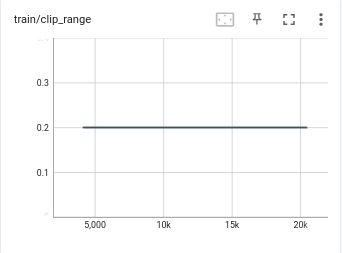

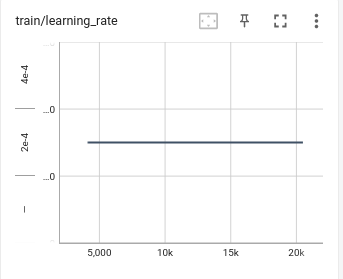

# Adding a Callback to the training Stage

In [99]:
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold

In [101]:
save_path = os.path.join('Training', 'Saved Models')
# log_path = os.path.join('Training', 'Logs')

In [103]:
stop_callback = StopTrainingOnRewardThreshold(reward_threshold=200, verbose=1)
eval_callback = EvalCallback(env, 
                             callback_on_new_best=stop_callback, 
                             eval_freq=10000, 
                             best_model_save_path=save_path, 
                             verbose=1)

In [104]:
model = PPO('MlpPolicy', env, verbose = 1, tensorboard_log=log_path)


Using cpu device


In [105]:
model.learn(total_timesteps=20000, callback=eval_callback)


Logging to Training/Logs/PPO_3
-----------------------------
| time/              |      |
|    fps             | 888  |
|    iterations      | 1    |
|    time_elapsed    | 2    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 606         |
|    iterations           | 2           |
|    time_elapsed         | 6           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008948296 |
|    clip_fraction        | 0.118       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686      |
|    explained_variance   | 0.00413     |
|    learning_rate        | 0.0003      |
|    loss                 | 5.76        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0186     |
|    value_loss           | 52.8        |
-----------------------------------------
---

/home/yogeshsoni/miniconda3/lib/python3.9/site-packages/stable_baselines3/common/evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=10000, episode_reward=200.00 +/- 0.00
Episode length: 200.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 200         |
|    mean_reward          | 200         |
| time/                   |             |
|    total_timesteps      | 10000       |
| train/                  |             |
|    approx_kl            | 0.008184712 |
|    clip_fraction        | 0.062       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.607      |
|    explained_variance   | 0.264       |
|    learning_rate        | 0.0003      |
|    loss                 | 31.6        |
|    n_updates            | 40          |
|    policy_gradient_loss | -0.0143     |
|    value_loss           | 63.3        |
-----------------------------------------
New best mean reward!
Stopping training because the mean reward 200.00  is above the threshold 200


# Change Policies

In [106]:
net_arch=[dict(pi=[128, 128, 128, 128], vf=[128, 128, 128, 128])]


In [107]:
model = PPO('MlpPolicy', env, verbose = 1, tensorboard_log=log_path, policy_kwargs={'net_arch':net_arch})


Using cpu device


In [108]:
model.learn(total_timesteps=20000, callback=eval_callback)


Logging to Training/Logs/PPO_4
-----------------------------
| time/              |      |
|    fps             | 797  |
|    iterations      | 1    |
|    time_elapsed    | 2    |
|    total_timesteps | 2048 |
-----------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 494        |
|    iterations           | 2          |
|    time_elapsed         | 8          |
|    total_timesteps      | 4096       |
| train/                  |            |
|    approx_kl            | 0.01558724 |
|    clip_fraction        | 0.236      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.681     |
|    explained_variance   | -0.00302   |
|    learning_rate        | 0.0003     |
|    loss                 | 5.48       |
|    n_updates            | 10         |
|    policy_gradient_loss | -0.0276    |
|    value_loss           | 21.7       |
----------------------------------------
---------------------

/home/yogeshsoni/miniconda3/lib/python3.9/site-packages/stable_baselines3/common/evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=10000, episode_reward=200.00 +/- 0.00
Episode length: 200.00 +/- 0.00
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 200          |
|    mean_reward          | 200          |
| time/                   |              |
|    total_timesteps      | 10000        |
| train/                  |              |
|    approx_kl            | 0.0101058865 |
|    clip_fraction        | 0.125        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.552       |
|    explained_variance   | 0.662        |
|    learning_rate        | 0.0003       |
|    loss                 | 10.8         |
|    n_updates            | 40           |
|    policy_gradient_loss | -0.0193      |
|    value_loss           | 37.5         |
------------------------------------------
------------------------------
| time/              |       |
|    fps             | 335   |
|    iterations      | 5     |
|    time_ela

# Using an Alternate Algorithm

In [109]:
from stable_baselines3 import DQN


In [110]:
model = DQN('MlpPolicy', env, verbose = 1, tensorboard_log=log_path)


Using cpu device


In [113]:
model.learn(total_timesteps=20000)


Logging to Training/Logs/DQN_3
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.973    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 2211     |
|    time_elapsed     | 0        |
|    total_timesteps  | 56       |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.936    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 3184     |
|    time_elapsed     | 0        |
|    total_timesteps  | 134      |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.9      |
| time/               |          |
|    episodes         | 12       |
|    fps              | 3400     |
|    time_elapsed     | 0        |
|    total_timesteps  | 210      |
----------------------------------
------------------------

In [114]:
DQN.load

<bound method BaseAlgorithm.load of <class 'stable_baselines3.dqn.dqn.DQN'>>